# 2022-01-12 Functions

* Using Julia
* Plotting
* Intro to floating point
* Summing series
* Relative vs absolute errors

# Julia

Julia is a relatively new programming language. Think of it as MATLAB done right, open source, and fast. It's nominally general-purpose, but mostly for numerical/scientific/statistical computing. There are great [learning resources](https://julialang.org/learning/). We'll introduce concepts and language features as we go.

In [33]:
# The last line of a cell is output by default
x = 3
y = 4

4

In [34]:
println("$x + $y = $(x + y)") # string formatting/interpolation
4;  # trailing semicolon suppresses output

3 + 4 = 7


In [3]:
@show x + y
x * y

x + y = 7


12

# Numbers

In [96]:
3, 3.0, 3.0f0 # integers, double precision, and single precision

(3, 3.0, 3.0f0)

In [95]:
typeof(3), typeof(3.0), typeof(3.0f0)

(Int64, Float64, Float32)

In [6]:
# automatic promotion
@show 3 + 3.0
@show 3.0 + 3.0f0
@show 3 + 3.0f0;

3 + 3.0 = 6.0
3.0 + 3.0f0 = 6.0
3 + 3.0f0 = 6.0f0


In [39]:
# floating and integer division
@show 3 / 2
@show -3 ÷ 2; # type `\div` and press TAB

3 / 2 = 1.5
-3 ÷ 2 = -1


# Arrays

In [44]:
[1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [9]:
# explcit typing
Float64[1,2,3]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [10]:
# promotion rules similar to arithmetic
[1,2,3.]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [46]:
x = [10, 20, 30]
x[2] # one-based indexing

20

In [48]:
#x[2] = 3.5

In [13]:
# multi-dimensional array
A = [10 20 30; 40 50 60]

2×3 Matrix{Int64}:
 10  20  30
 40  50  60

# Functions

In [62]:
function f(x, y; z=3)
    sqrt(x*x + y*y) + z
end

f (generic function with 2 methods)

In [64]:
f(3, 4, z=5)

10.0

In [65]:
g(x, y) = sqrt(x^2 + y^2)
g(3, 4)

5.0

In [17]:
((x, y) -> sqrt(x^2 + y^2))(3, 4)

5.0

# Loops

In [66]:
# ranges
1:5

1:5

In [19]:
collect(1:5)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [68]:
x = 0
for n in 1:5000
    x += 1/n^2
end
@show x
x - pi^2/6 # trivia you can easily look up if needed

x = 1.6447340868469014


-0.00019998000132503968

In [70]:
# list comprehensions
sum([1/n^2 for n in 1:1000])

1.6439345666815612

# Poll: What is floating point arithmetic?

1. fuzzy arithmetic
2. exact arithmetic, correctly rounded
3. the primary focus of numerical analysis

In [72]:
0.1 + 0.2

0.30000000000000004

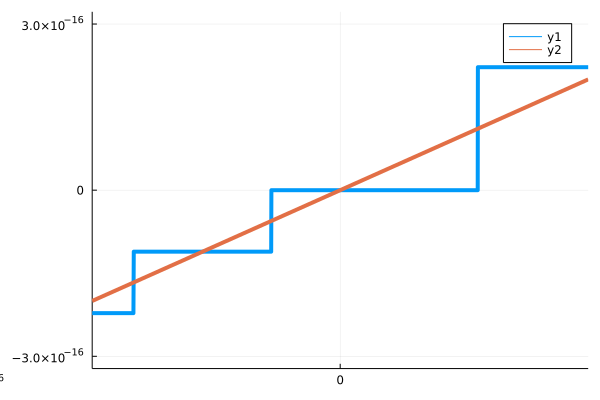

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jed/.julia/packages/PlotUtils/xekml/src/ticks.jl:333
┌ Warning: No strict ticks found
└ @ PlotUtils /home/jed/.julia/packages/PlotUtils/xekml/src/ticks.jl:333
┌ Warning: No strict ticks found
└ @ PlotUtils /home/jed/.julia/packages/PlotUtils/xekml/src/ticks.jl:333
┌ Warning: No strict ticks found
└ @ PlotUtils /home/jed/.julia/packages/PlotUtils/xekml/src/ticks.jl:333


In [82]:
using Plots
default(linewidth=4)
plot(x -> (1 + x) - 1, xlims=(-2e-16, 2e-16))
plot!(x -> x)

# Machine epsilon

We approximate real numbers with **floating point** arithmetic, which can only represent discrete values. In particular, there exists a largest number, which we call $\epsilon_{\text{machine}}$, such that
$$ 1 \oplus x = 1 \quad \text{for all}\  \lvert x \rvert < \epsilon_{\text{machine}}.$$

The notation $\oplus, \ominus, \odot, \oslash$ represent the elementary operation carried out in floating point arithmetic.

In [80]:
eps = 1
while 1 + eps != 1
    eps = eps / 2
end
eps

1.1102230246251565e-16

In [81]:
eps = 1.f0
while 1 + eps != 1
    eps = eps / 2
end
eps

5.9604645f-8

# Beating `exp`

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dotsb$$

Suppose we want to compute $f(x) = e^x - 1$ for small values of $x$.

In [89]:
f1(x) = exp(x) - 1
y1 = f1(1e-8)

9.99999993922529e-9

In [87]:
f2(x) = x + x^2/2 + x^3/6
y2 = f2(1e-8)

1.000000005e-8

Which answer is more accurate?

In [27]:
@show (y1 - y2)        # Absolute difference
@show (y1 - y2) / y2;  # Relative difference

y1 - y2 = -1.1077470910720506e-16
(y1 - y2) / y2 = -1.1077470855333152e-8


In [91]:
0 / 0

NaN